# ARMA process using statsmodels in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\Users\HoT\Anaconda3_2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Simulation of AR(p) process

In [3]:
# Function for simulating AR(p) process
# Order p of AR(p) process and args for AR parameters 
# Remark: the AR parameters are negative if the input 
# parameters are positive, and vice and versa.
def AR(order=1,*args):
    ar=np.append(order,args)
    ma=np.array([1])
    AR_object=ArmaProcess(ar,ma)
    sim_AR=AR_object.generate_sample(nsample=1000)
    return sim_AR

In [4]:
# As an example, we study AR(1) with the different negative parameters.
AR_parm=[0.1,0.2,0.5,0.9]
sim_AR=[]
for i in AR_parm:
    sim_AR.append(AR(1,i))

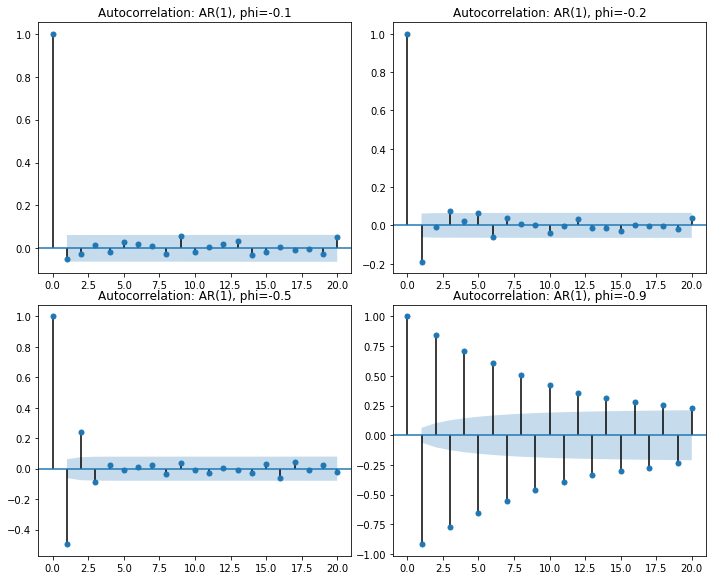

In [6]:
# Plotting autocorrelation with different parameters
# Autocorrelations of AR(p) tail off
plt.show()
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(10,8))
plt.tight_layout()
ax=[ax1,ax2,ax3,ax4]
for i in range(4):
    plot_acf(sim_AR[i],ax[i],alpha=0.05,lags=20,title="Autocorrelation: AR(1), phi="+str(-AR_parm[i]))

In [7]:
plt.close('all')

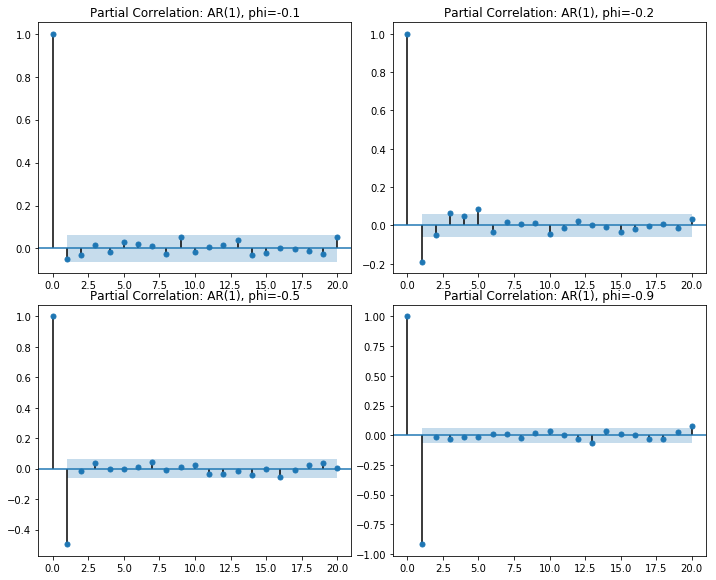

In [9]:
# Plotting partial correlations of AR(1)
# Partial correlations of AR(1) cut off at p
plt.show()
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(10,8))
plt.tight_layout()
ax=[ax1,ax2,ax3,ax4]
for i in range(4):
    plot_pacf(sim_AR[i],ax[i],alpha=0.05,lags=20,title="Partial Correlation: AR(1), phi="+str(-AR_parm[i]))

In [10]:
plt.close('all')

In [11]:
# Example of AR(1) with positive parameters
AR_parm=[-0.1,-0.2,-0.5,-0.9]
sim_AR=[]
for i in AR_parm:
    sim_AR.append(AR(1,i))

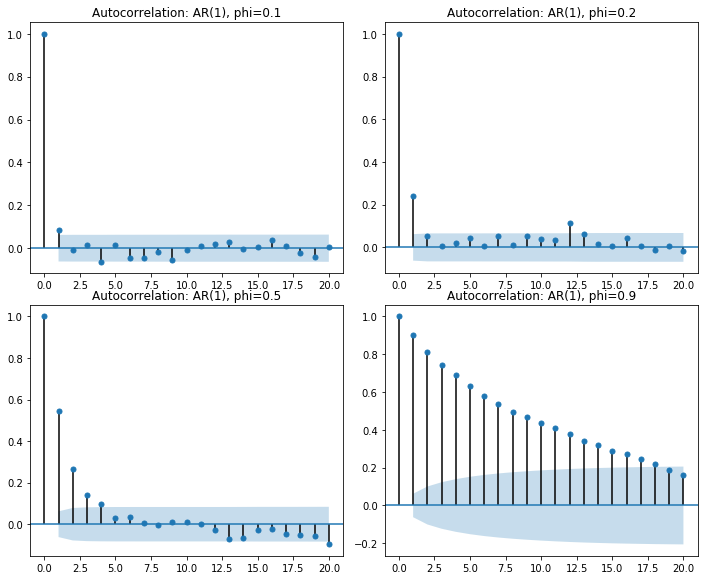

In [13]:
# Plotting autocorrelation
# Autocorrelations of AR(p) tail off
plt.show()
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(10,8))
plt.tight_layout()
ax=[ax1,ax2,ax3,ax4]
for i in range(4):
    plot_acf(sim_AR[i],ax[i],alpha=0.05,lags=20,title="Autocorrelation: AR(1), phi="+str(-AR_parm[i]))

In [14]:
plt.close('all')

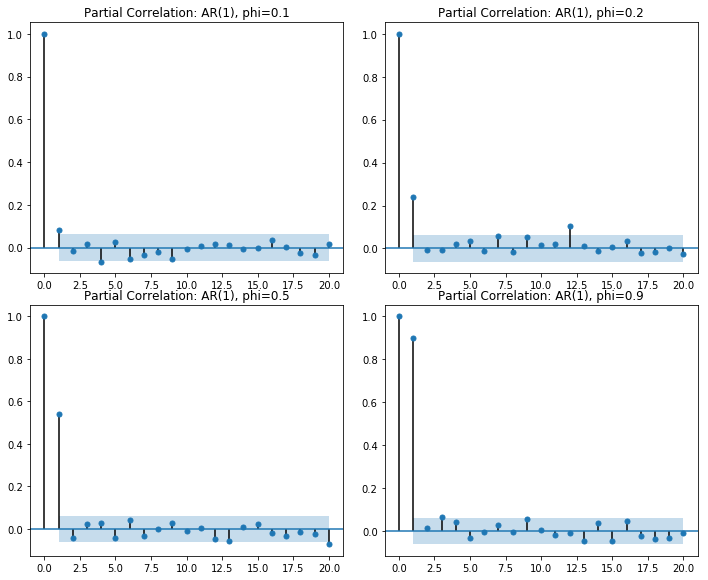

In [16]:
# Plotting partial correlation
# Partial correlations of AR(p) cut off at p
# Here partial correlations of AR(1) cut off at 1
plt.show()
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(10,8))
plt.tight_layout()
ax=[ax1,ax2,ax3,ax4]
for i in range(4):
    plot_pacf(sim_AR[i],ax[i],alpha=0.05,lags=20,title="Partial Correlation: AR(1), phi="+str(-AR_parm[i]))

In [17]:
plt.close('all')

In [18]:
# Simulation of AR(2) process with negative parameters
sim_AR2=AR(2,0.5,0.5)

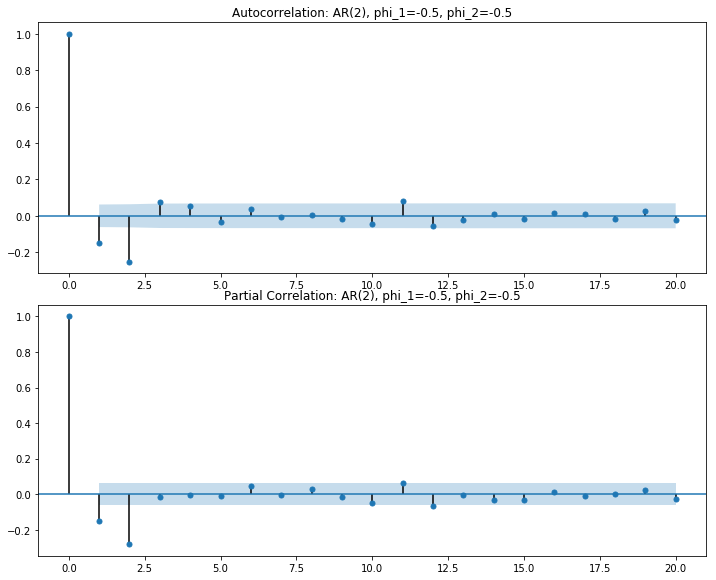

In [19]:
# Plotting autocorrelation
# Autocorrelations of AR(2) tail off
# Partial correlations of AR(2) cut off at 2
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,figsize=(10,8))
plt.tight_layout()
plot_acf(sim_AR2,ax1,alpha=0.05,lags=20,title="Autocorrelation: AR(2), phi_1=-0.5, phi_2=-0.5")
plot_pacf(sim_AR2,ax2,alpha=0.05,lags=20,title="Partial Correlation: AR(2), phi_1=-0.5, phi_2=-0.5")

In [20]:
plt.close('all')

In [21]:
# Simulation of AR(2) process with positive parameters
sim_AR2_2=AR(2,-0.5,-0.5)

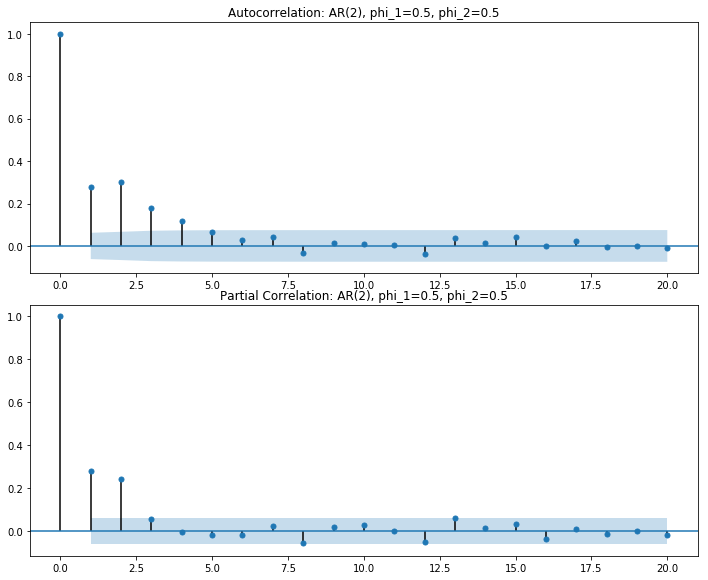

In [22]:
# Plotting autocorrelation and partial correlation
# Autocorrelations of AR(2) tail off
# Partial correlations of AR(2) cut off at 2
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,figsize=(10,8))
plt.tight_layout()
plot_acf(sim_AR2_2,ax1,alpha=0.05,lags=20,title="Autocorrelation: AR(2), phi_1=0.5, phi_2=0.5")
plot_pacf(sim_AR2_2,ax2,alpha=0.05,lags=20,title="Partial Correlation: AR(2), phi_1=0.5, phi_2=0.5")

# Estimation of AR(p) process

In [23]:
from statsmodels.tsa.arima_model import ARMA

In [24]:
# Estimate AR(1) process
mod=ARMA(sim_AR[0],order=(1,0))
result=mod.fit()

In [25]:
result.params

array([ 0.00032651,  0.08314542])

In [26]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1409.191
Method:                       css-mle   S.D. of innovations              0.990
Date:                Mon, 16 Apr 2018   AIC                           2824.381
Time:                        23:59:36   BIC                           2839.104
Sample:                             0   HQIC                          2829.977
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.034      0.010      0.992      -0.067       0.067
ar.L1.y        0.0831      0.032      2.638      0.008       0.021       0.145
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           12.0271           +0.0000j           12.0271            0.0000
-----------------------------------------------------------------------------
"""

In [27]:
# AIC & BIC
print(result.aic)
print(result.bic)

2824.3812283648344
2839.1044942


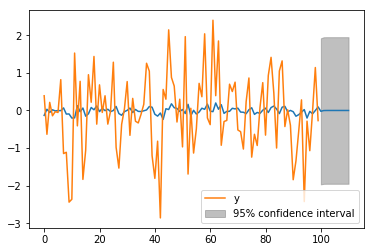

In [28]:
# Predict the AR series
result.plot_predict(start=900, end=1010)

In [29]:
# Estimate AR(2) process
mod=ARMA(sim_AR2,order=(2,0))
result2=mod.fit()

In [30]:
result2.params

array([ 0.00315442, -0.19409008, -0.28215712])

In [31]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(2, 0)   Log Likelihood                -729.934
Method:                       css-mle   S.D. of innovations              0.502
Date:                Tue, 17 Apr 2018   AIC                           1467.867
Time:                        00:00:45   BIC                           1487.498
Sample:                             0   HQIC                          1475.328
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0032      0.011      0.293      0.769      -0.018       0.024
ar.L1.y       -0.1941      0.030     -6.398      0.000      -0.254      -0.135
ar.L2.y       -0.2822      0.030     -9.304      0.000      -0.342      -0.223
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.3439           -1.8509j            1.8826           -0.2792
AR.2           -0.3439           +1.8509j            1.8826            0.2792
-----------------------------------------------------------------------------
"""

In [32]:
print(result2.aic)
print(result2.bic)

1467.8670746101589
1487.49809573


In [33]:
plt.close('all')

# Simulation of MA(q) process

In [34]:
# Function for simulating MA(q) process
# Order q and parameters for MA process
def MA(order,*args):
    ar=np.array([1])
    ma=np.append(order,args)
    MA_object=ArmaProcess(ar,ma)
    sim_MA=MA_object.generate_sample(nsample=1000)
    return sim_MA

In [35]:
# Simulate MA(1) process
MA_parm=[0.1,0.9,-0.1,-0.9]
sim_MA=[]
for i in MA_parm:
    sim_MA.append(MA(1,i))

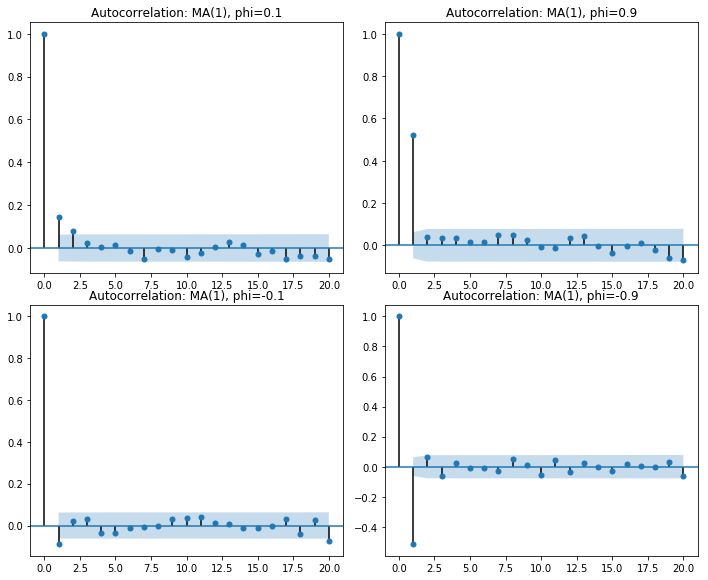

In [37]:
# Plotting autocorrelation
# Autocorrelations of MA(q) cut off at q
plt.show()
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(10,8))
plt.tight_layout()
ax=[ax1,ax2,ax3,ax4]
for i in range(4):
    plot_acf(sim_MA[i],ax[i],alpha=0.05,lags=20,title="Autocorrelation: MA(1), phi="+str(MA_parm[i]))

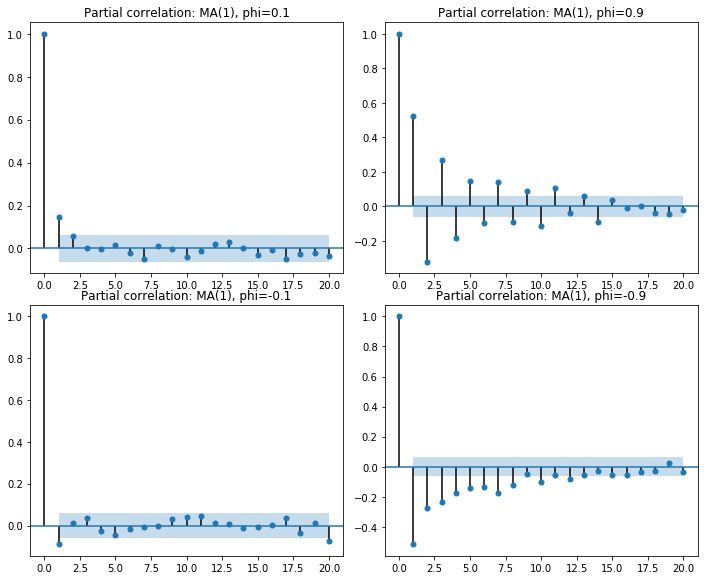

In [39]:
# Plotting partial correlation
# Partial correlations of MA(q) tail off
plt.show()
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(10,8))
plt.tight_layout()
ax=[ax1,ax2,ax3,ax4]
for i in range(4):
    plot_pacf(sim_MA[i],ax[i],alpha=0.05,lags=20,title="Partial correlation: MA(1), phi="+str(MA_parm[i]))

# Estimation of MA(q) process

In [40]:
# Estimate MA(1) process
mod=ARMA(sim_MA[0],order=(0,1))
result3=mod.fit()

In [41]:
result3.params

array([-0.01200433,  0.12991916])

In [42]:
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1451.455
Method:                       css-mle   S.D. of innovations              1.033
Date:                Tue, 17 Apr 2018   AIC                           2908.909
Time:                        00:02:19   BIC                           2923.632
Sample:                             0   HQIC                          2914.505
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0120      0.037     -0.325      0.745      -0.084       0.060
ma.L1.y        0.1299      0.029      4.430      0.000       0.072       0.187
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -7.6971           +0.0000j            7.6971            0.5000
-----------------------------------------------------------------------------
"""

# Simulation of ARMA process

In [43]:
ar=np.array([1,-0.5])
ma=np.array([1,0.5])
ARMA_object=ArmaProcess(ar,ma)
sim_ARMA=ARMA_object.generate_sample(nsample=1000)

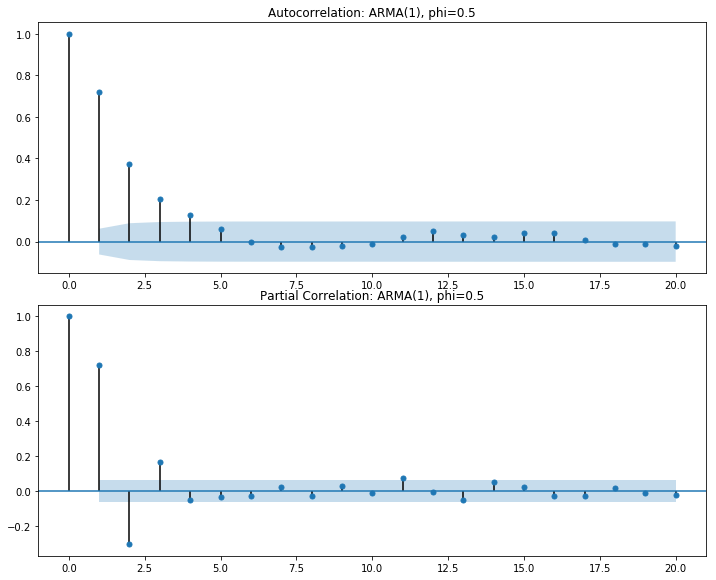

In [44]:
# Plotting autocorrelation & partial correlation
# Autocorrelation & partial correlation tail off
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,figsize=(10,8))
plt.tight_layout()
plot_acf(sim_ARMA,ax1,alpha=0.05,lags=20,title="Autocorrelation: ARMA(1), phi=0.5")
plot_pacf(sim_ARMA,ax2,alpha=0.05,lags=20,title="Partial Correlation: ARMA(1), phi=0.5")

# Estimation of ARMA process

In [45]:
mod=ARMA(sim_ARMA,order=(1,1))
result4=mod.fit()

In [46]:
result4.params

array([-0.10974466,  0.51859938,  0.47683723])

In [47]:
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 1)   Log Likelihood               -1393.253
Method:                       css-mle   S.D. of innovations              0.974
Date:                Tue, 17 Apr 2018   AIC                           2794.506
Time:                        00:03:17   BIC                           2814.137
Sample:                             0   HQIC                          2801.967
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1097      0.094     -1.163      0.245      -0.295       0.075
ar.L1.y        0.5186      0.034     15.423      0.000       0.453       0.585
ma.L1.y        0.4768      0.034     13.915      0.000       0.410       0.544
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9283           +0.0000j            1.9283            0.0000
MA.1           -2.0972           +0.0000j            2.0972            0.5000
-----------------------------------------------------------------------------
"""